In [ ]:
!pip install rdkit==2023.09.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 42.1 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd

**Representing atoms**

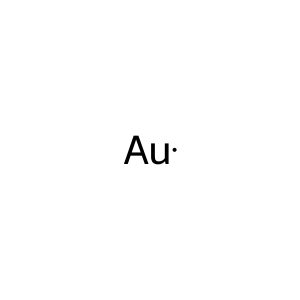

In [ ]:
# for atoms
m = Chem.MolFromSmiles('[Au]')
img = Draw.MolToImage(m)
img

**Hyrocarbons**

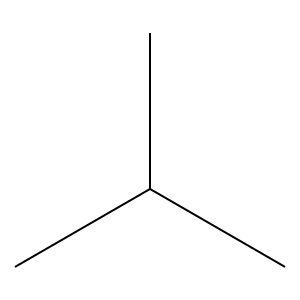

In [ ]:
# for alkyl chains
m = Chem.MolFromSmiles('CC(C)C')
img = Draw.MolToImage(m)
img

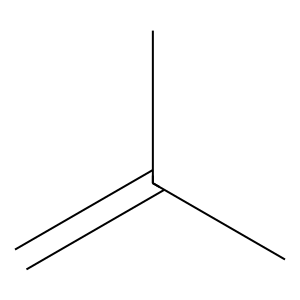

In [ ]:
# for alkenes
m = Chem.MolFromSmiles('C=C(C)C')
img = Draw.MolToImage(m)
img

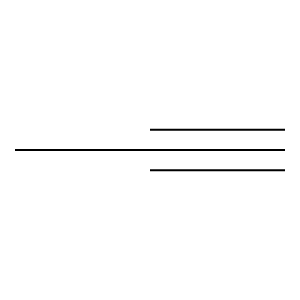

In [ ]:
# for alkynes
m = Chem.MolFromSmiles('C#CC')
img = Draw.MolToImage(m)
img

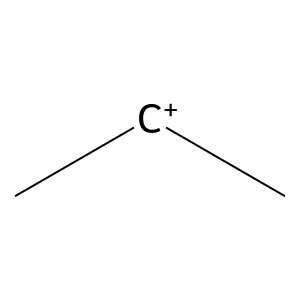

In [ ]:
# for charged species
m = Chem.MolFromSmiles('C[CH+]C')
img = Draw.MolToImage(m)
img

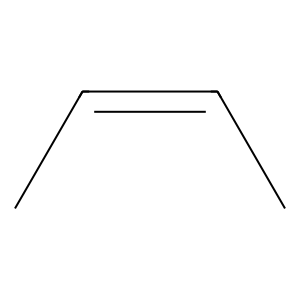

In [ ]:
# for cis/trans compounds
m = Chem.MolFromSmiles('C\C=C/C')
img = Draw.MolToImage(m)
img

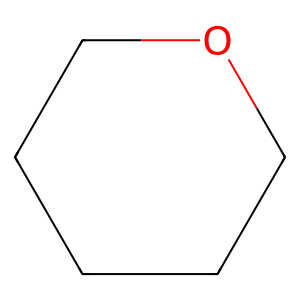

In [ ]:
# for cyclic compounds
m = Chem.MolFromSmiles('C3CCCCO3')
img = Draw.MolToImage(m)
img

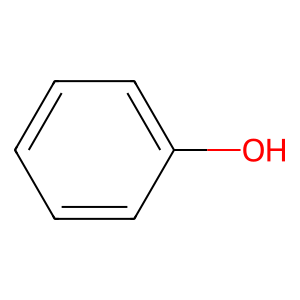

In [ ]:
# for aromatic systems
m = Chem.MolFromSmiles('c1ccccc1O')
img = Draw.MolToImage(m)
img

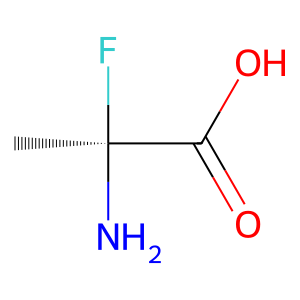

In [ ]:
# for steroisomers
m = Chem.MolFromSmiles('N[C@@](C)(F)C(=O)O')
img = Draw.MolToImage(m)
img

**Remove Duplicate SMILES**

In [ ]:
df = pd.read_excel('smiles.xlsx')

In [ ]:
df

,Name,Smiles
0,Phenol,OC1=CC=CC=C1
1,Phenol,Oc1ccccc1
2,Phenol,OC4=CC=CC=C4
3,Phenol,c1ccccc1O
4,2-pyridinol,Oc1ncccc1
5,2-pyridinol,OC1=NC=CC=C1
6,2-pyridinol,OC1=CC=CC=N1
7,trans-2-pentene,C/C=C/CC
8,trans-2-pentene,CC\C=C\C
9,trans-2-pentene,C\C=C\CC


In [ ]:
df['Name'].unique()

array(['Phenol', '2-pyridinol', 'trans-2-pentene'], dtype=object)

In [ ]:
df['Smiles'].nunique()

10

In [ ]:
mols = [Chem.MolFromSmiles(smile) for smile in df['Smiles']]

In [ ]:
img=Draw.MolsToGridImage(mols,molsPerRow=4,subImgSize=(200,200),legends=[name for name in df['Name']])

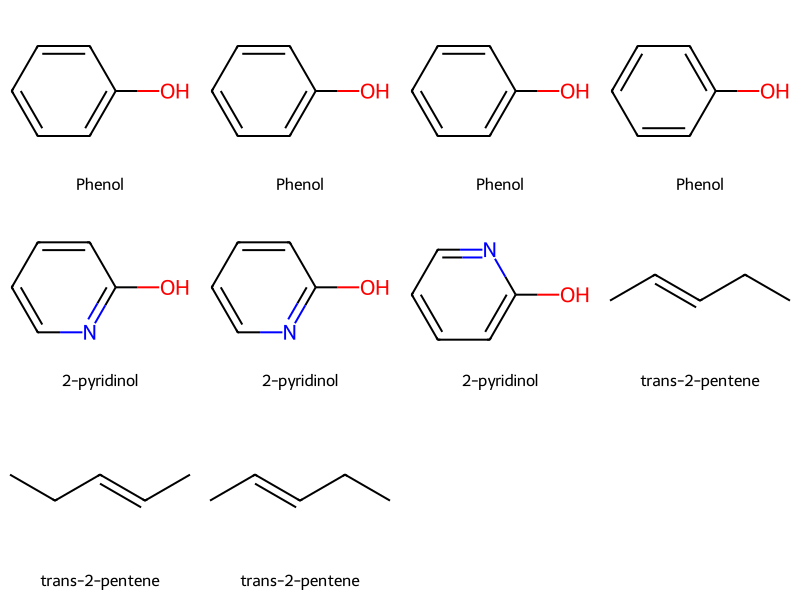

In [ ]:
img

In [ ]:
df

,Name,Smiles
0,Phenol,OC1=CC=CC=C1
1,Phenol,Oc1ccccc1
2,Phenol,OC4=CC=CC=C4
3,Phenol,c1ccccc1O
4,2-pyridinol,Oc1ncccc1
5,2-pyridinol,OC1=NC=CC=C1
6,2-pyridinol,OC1=CC=CC=N1
7,trans-2-pentene,C/C=C/CC
8,trans-2-pentene,CC\C=C\C
9,trans-2-pentene,C\C=C\CC


In [ ]:
can_smiles = []
for smile in df['Smiles']:
  mol = Chem.MolFromSmiles(smile)
  can_smiles.append(Chem.MolToSmiles(mol))


df['can_smiles'] = can_smiles

In [ ]:
df

,Name,Smiles,can_smiles
0,Phenol,OC1=CC=CC=C1,Oc1ccccc1
1,Phenol,Oc1ccccc1,Oc1ccccc1
2,Phenol,OC4=CC=CC=C4,Oc1ccccc1
3,Phenol,c1ccccc1O,Oc1ccccc1
4,2-pyridinol,Oc1ncccc1,Oc1ccccn1
5,2-pyridinol,OC1=NC=CC=C1,Oc1ccccn1
6,2-pyridinol,OC1=CC=CC=N1,Oc1ccccn1
7,trans-2-pentene,C/C=C/CC,C/C=C/CC
8,trans-2-pentene,CC\C=C\C,C/C=C/CC
9,trans-2-pentene,C\C=C\CC,C/C=C/CC


In [ ]:
df.drop_duplicates(subset=['can_smiles'], inplace=True)

In [ ]:
df

,Name,Smiles,can_smiles
0,Phenol,OC1=CC=CC=C1,Oc1ccccc1
4,2-pyridinol,Oc1ncccc1,Oc1ccccn1
7,trans-2-pentene,C/C=C/CC,C/C=C/CC


In [ ]:
df.drop('Smiles', axis=1, inplace=True)

In [ ]:
df

,Name,can_smiles
0,Phenol,Oc1ccccc1
4,2-pyridinol,Oc1ccccn1
7,trans-2-pentene,C/C=C/CC
